In [1]:
# Impor pustaka dasar
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

# Impor pustaka visualisasi dan metrik
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm

# Impor pustaka classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

# Itertools buat plotting
import itertools

In [2]:
# Fungsi transpose kolom 'kelas' dari x menjadi y
def preprocess_data(x, channel):
    y = pd.read_excel(x)
    i = 0
    for i in range(len(y.index)):
        y.rename(index={i: channel[i]}, inplace=True)
        i+=1
    y = y.T
    y = y[1:]
    return y

In [3]:
# Fungsi untuk mengaplikasikan data ke bilah kategori
def labels_to_categorical(x):
    y = to_categorical(x)
    return y

In [4]:
# Fungsi normalisasi data dengan standar deviasi
def normalize_data(x):
    i = x.shape[1]
    i = i-1
    y = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
    y = y[:,:i]
    return y

In [5]:
# Fungsi untuk menjadikan kolom x sebuah array
def x_to_array(x):
    y = x.values
    return y

In [6]:
# Fungsi untuk membuat kelas
def addclass(x, name):
    x['Class'] = pd.Series(name, index=x.index)
    return x

In [7]:
# Fungsi untuk menggabungkan 5 array
def mergedf5(x1, x2, x3, x4, x5):
    y = pd.concat([x1, x2, x3, x4, x5])
    return y

In [8]:
# Membuat grafis matrix kekalutan
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Pembuatan matriks saat normalisasi 'true' atau 'false'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    # Pembuatan
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    # Label data
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [9]:
# Pembuatan nama kelas
classes = ['60Co', '22Na', '241Am', 'Mix', '90Sr']

In [10]:
classes = ['60Co', '22Na', '241Am', 'Mix', '90Sr']

In [11]:
# Membuat indeks data
kal = pd.read_excel('Co_1.xlsx')
kal = kal.iloc[::,0]
kal = kal.astype(str)

In [12]:
# Memproses semua data dan mengindekskan seperti input sebelumnya
co1 = preprocess_data('Co_1.xlsx', kal)
co2 = preprocess_data('Co_2.xlsx', kal)
na1 = preprocess_data('Na_1.xlsx', kal)
na2 = preprocess_data('Na_2.xlsx', kal)
am1 = preprocess_data('Am_1.xlsx', kal)
am2 = preprocess_data('Am_2.xlsx', kal)
mix1 = preprocess_data('Mix_1.xlsx', kal)
mix2 = preprocess_data('Mix_2.xlsx', kal)
sr1 = preprocess_data('Sr_1.xlsx', kal)
sr2 = preprocess_data('Sr_2.xlsx', kal)

# Test array length
print(co1.shape)

(40, 256)


In [13]:
# Menggabungkan data yang terpisah
co = pd.concat([co1, co2])
na = pd.concat([na1, na2])
am = pd.concat([am1, am2])
mix = pd.concat([mix1, mix2])
sr = pd.concat([sr1, sr2])

In [14]:
# Memberikan indeks kelas pada masih-masing data
co = addclass(co, 0)
na = addclass(na, 1)
am = addclass(am, 2)
mix = addclass(mix, 3)
sr = addclass(sr, 4)

In [15]:
all_data = mergedf5(co, na, am, mix, sr)

# Test length
all_data.shape

(582, 257)

In [16]:
testAm = preprocess_data('Test80_Am.xlsx', kal)
testCo = preprocess_data('Test80_Co.xlsx', kal)
testMix = preprocess_data('Test80_Mix.xlsx', kal)
testNa = preprocess_data('Test80_Na.xlsx', kal)
testSr = preprocess_data('Test80_Sr.xlsx', kal)

In [17]:
# Memberikan indeks kelas pada masih-masing data
testCo = addclass(testCo, 0)
testNa = addclass(testNa, 1)
testAm = addclass(testAm, 2)
testMix = addclass(testMix, 3)
testSr = addclass(testSr, 4)

In [18]:
test = mergedf5(testCo, testNa, testAm, testMix, testSr)

# Test Length
test.shape

,-19.7,-8.7,2.3,13.2,24.2,35.2,46.2,57.1,68.1,79.1,...,2690.3,2701.3,2712.2,2723.2,2734.2,2745.2,2756.1,2767.1,2778.1,Class
N_Co,0.0,0.0,18.0,32.0,50.0,37.0,44.0,52.0,85.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0
N_Na,0.0,0.0,14.0,15.0,17.0,22.0,20.0,40.0,32.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1
N_Am,0.0,13.0,510.0,722.0,330.0,122.0,846.0,2930.0,2177.0,433.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,2
N_Mix,0.0,13.0,312.0,455.0,529.0,543.0,616.0,753.0,828.0,896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3
N_Sr,0.0,1.0,121.0,164.0,131.0,121.0,142.0,151.0,194.0,221.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4
N_Co,0.0,2.0,37.0,64.0,76.0,82.0,103.0,111.0,133.0,187.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.0,0
N_Na,0.0,2.0,27.0,31.0,33.0,37.0,45.0,50.0,68.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,21.0,1
N_Am,0.0,26.0,1039.0,1499.0,786.0,261.0,1751.0,5855.0,4471.0,853.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,2
N_Mix,0.0,42.0,696.0,950.0,981.0,1120.0,1243.0,1473.0,1660.0,1790.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,3
N_Sr,0.0,7.0,221.0,344.0,269.0,275.0,303.0,282.0,379.0,401.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,4


In [19]:
# Mengubah data training menjadi array dan menormalisasikannya
X = x_to_array(all_data)
X = normalize_data(X)

# Test Length
X.shape

(582, 256)

In [20]:
# Sama seperti sebelumnya, tapi ini kolom kelasnya doang
y = all_data['Class']
y = x_to_array(y)

# Test Length
y.shape

(582,)

In [21]:
# Masih sama, ini utuk data test
X_test = x_to_array(test)
X_test = normalize_data(X_test)

# Test Length
print(X_test.shape)

(5, 256)
(5, 256)
(10, 256)


In [23]:
y_test = test['Class']
y_test = x_to_array(y_test)

# Test Length
print(y_test.shape)

(5,)
(5,)
(10,)


In [24]:
# Memisahkan data training menjadi dua bagian untuk validasi
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, random_state=4) #Data training 90% dan validasi 10%

# Test Length
print ('Train set:', X_train.shape,  y_train.shape)
print ('Val set:', X_val.shape,  y_val.shape)

Train set: (523, 256) (523,)
Val set: (59, 256) (59,)


In [39]:
svclassifier = SVC(kernel = 'rbf', gamma = 'auto')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
from sklearn.gaussian_process.kernels import RBF
gpcclassifier = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0),n_restarts_optimizer = 1, random_state = 0)
gpcclassifier.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=1, optimizer='fmin_l_bfgs_b',
             random_state=0, warm_start=False)

In [40]:
y_pred = svclassifier.predict(X_val)
y_pred1 = svclassifier.predict(X_test45)
y_pred2 = svclassifier.predict(X_test90)
y_pred3 = svclassifier.predict(X_test)
y_gpcpred = gpcclassifier.predict(X_val)

In [41]:
cm = confusion_matrix(y_val, y_pred)
cm1 = confusion_matrix(y_test_45, y_pred1)
cm2 = confusion_matrix(y_test_90, y_pred2)
cm3 = confusion_matrix(y_test_, y_pred3)
cmgpc1 = confusion_matrix(y_val, y_gpcpred)

In [42]:
cr = classification_report(y_val, y_pred)
cr1 = classification_report(y_test_45, y_pred1)
cr2 = classification_report(y_test_90, y_pred2)
cr3 = classification_report(y_test_, y_pred3)
crgpc1 = classification_report(y_val, y_gpcpred)
print("Accuracy 45: {}%".format(svclassifier.score(X_test45, y_test_45) * 100 ))
print("Accuracy 90: {}%".format(svclassifier.score(X_test90, y_test_90) * 100 ))
print("Accuracy Overall: {}%".format(svclassifier.score(X_test, y_test_) * 100 ))
print("Accuracy Data Validasi: {}%".format(svclassifier.score(X_val, y_val) * 100 ))
print("Accuracy Data Validasi GPC: {}%".format(gpcclassifier.score(X_test, y_test_) * 100 ))

Accuracy 45: 100.0%
Accuracy 90: 100.0%
Accuracy Overall: 100.0%
Accuracy Data Validasi: 100.0%
Accuracy Data Validasi GPC: 50.0%


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



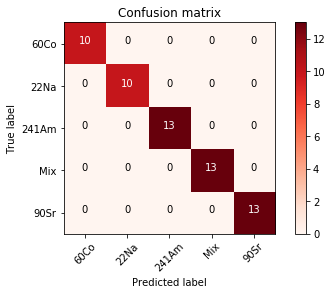

In [43]:
plot_confusion_matrix(cm, classes = classes)
print(cr)

Confusion matrix, without normalization
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]]
Ini yang 45 s.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5



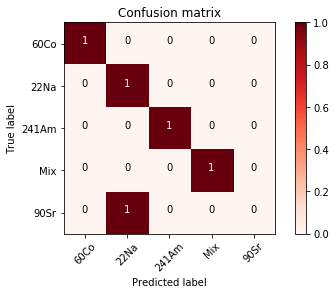

In [38]:
plot_confusion_matrix(cm1, classes = classes)
print("Ini yang 45 s.")
print(cr1)

Confusion matrix, without normalization
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]]
Ini yang 90 s.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5



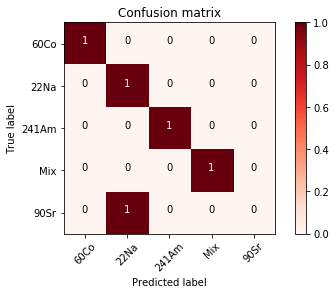

In [34]:
plot_confusion_matrix(cm2, classes = classes)
print("Ini yang 90 s.")
print(cr2)

Confusion matrix, without normalization
[[1 1 0 0 0]
 [0 2 0 0 0]
 [0 1 1 0 0]
 [0 0 0 2 0]
 [0 2 0 0 0]]
Ini Total.
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.33      1.00      0.50         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2

   micro avg       0.60      0.60      0.60        10
   macro avg       0.67      0.60      0.57        10
weighted avg       0.67      0.60      0.57        10



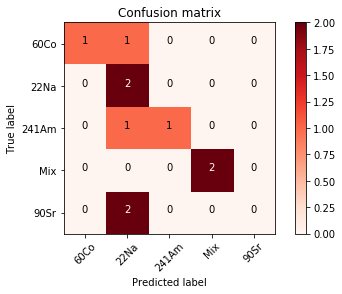

In [35]:
plot_confusion_matrix(cm3, classes = classes)
print("Ini Total.")
print(cr3)

Confusion matrix, without normalization
[[10  0  0  0  0]
 [ 0  4  0  6  0]
 [ 0  7  0  6  0]
 [ 0  0  0 13  0]
 [ 4  8  0  1  0]]
Ini Total.
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.21      0.40      0.28        10
           2       0.00      0.00      0.00        13
           3       0.50      1.00      0.67        13
           4       0.00      0.00      0.00        13

   micro avg       0.46      0.46      0.46        59
   macro avg       0.28      0.48      0.36        59
weighted avg       0.27      0.46      0.33        59



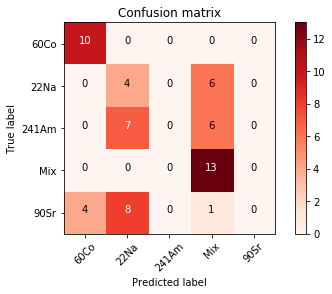

In [36]:
plot_confusion_matrix(cmgpc1, classes = classes)
print("Ini Total.")
print(crgpc1)